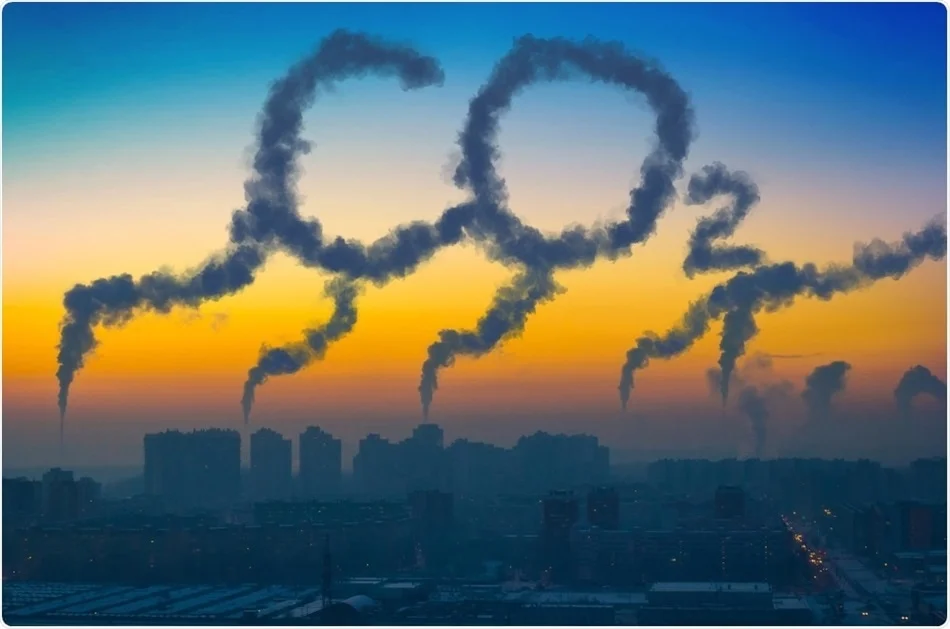

# Import libraries

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")


# Read Data

In [2]:
df=pd.read_csv("CO2_emission.csv")
df.head()

,Country Name,country_code,Region,Indicator Name,1990,1991,1992,1993,1994,1995,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2019.1
0,Aruba,ABW,Latin America & Caribbean,CO2 emissions (metric tons per capita),NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,AFG,South Asia,CO2 emissions (metric tons per capita),0.191745,0.167682,0.095958,0.084721,0.075546,0.068468,...,0.296506,0.259295,0.185624,0.146236,0.172897,0.149789,0.131695,0.163295,0.159824,0.159824
2,Angola,AGO,Sub-Saharan Africa,CO2 emissions (metric tons per capita),0.553662,0.544539,0.543557,0.708984,0.836804,0.912141,...,0.985522,0.950696,1.036294,1.099779,1.135044,1.031811,0.813301,0.777675,0.792137,0.792137
3,Albania,ALB,Europe & Central Asia,CO2 emissions (metric tons per capita),1.819542,1.242810,0.683700,0.638307,0.645355,0.605436,...,1.669423,1.503240,1.533630,1.668337,1.603775,1.557664,1.788786,1.782739,1.692248,1.692248
4,Andorra,AND,Europe & Central Asia,CO2 emissions (metric tons per capita),7.521832,7.235379,6.963079,6.724178,6.541579,6.733479,...,5.850886,5.944654,5.942800,5.807128,6.026182,6.080600,6.104134,6.362975,6.481217,6.481217


In [3]:
## 'Indicator Name' column contain only one value. use nunique function for further checking

In [4]:
df.nunique()

Country Name      215
country_code      215
Region              7
Indicator Name      1
1990              185
1991              186
1992              189
1993              189
1994              189
1995              190
1996              190
1997              190
1998              189
1999              189
2000              190
2001              190
2002              191
2003              191
2004              191
2005              191
2006              191
2007              191
2008              191
2009              191
2010              191
2011              191
2012              191
2013              191
2014              191
2015              191
2016              191
2017              191
2018              191
2019              191
2019.1            191
dtype: int64

In [5]:
## Acoording to above we will del 'Indicator Name' column
del df['Indicator Name']

In [6]:
df.duplicated().sum()

0

##### Now we need to reshaping dataframe

In [7]:
df1=df.set_index(['Country Name','country_code','Region'],inplace=True)
df1=df.stack(dropna = False).reset_index()
df1.head()

,Country Name,country_code,Region,level_3,0
0,Aruba,ABW,Latin America & Caribbean,1990,NaN
1,Aruba,ABW,Latin America & Caribbean,1991,NaN
2,Aruba,ABW,Latin America & Caribbean,1992,NaN
3,Aruba,ABW,Latin America & Caribbean,1993,NaN
4,Aruba,ABW,Latin America & Caribbean,1994,NaN


In [8]:
df1.rename(columns ={'Country Name':'Country','level_3':'year', 0:'CO2_emissions'}, inplace = True)
df1.head()

,Country,country_code,Region,year,CO2_emissions
0,Aruba,ABW,Latin America & Caribbean,1990,NaN
1,Aruba,ABW,Latin America & Caribbean,1991,NaN
2,Aruba,ABW,Latin America & Caribbean,1992,NaN
3,Aruba,ABW,Latin America & Caribbean,1993,NaN
4,Aruba,ABW,Latin America & Caribbean,1994,NaN


In [9]:
df1.shape

(6665, 5)

In [11]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6665 entries, 0 to 6664
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Country        6665 non-null   object 
 1   country_code   6665 non-null   object 
 2   Region         6665 non-null   object 
 3   year           6665 non-null   object 
 4   CO2_emissions  5895 non-null   float64
dtypes: float64(1), object(4)
memory usage: 260.5+ KB


In [12]:
df1.nunique()

Country           215
country_code      215
Region              7
year               31
CO2_emissions    5704
dtype: int64

In [13]:
df1.isna().sum()

Country            0
country_code       0
Region             0
year               0
CO2_emissions    770
dtype: int64

In [15]:
## more analysis about nan

df_filtered=df1[df1['CO2_emissions'].isnull()]
df_filtered

,Country,country_code,Region,year,CO2_emissions
0,Aruba,ABW,Latin America & Caribbean,1990,NaN
1,Aruba,ABW,Latin America & Caribbean,1991,NaN
2,Aruba,ABW,Latin America & Caribbean,1992,NaN
3,Aruba,ABW,Latin America & Caribbean,1993,NaN
4,Aruba,ABW,Latin America & Caribbean,1994,NaN
...,...,...,...,...,...
6443,Virgin Islands (U.S.),VIR,Latin America & Caribbean,2016,NaN
6444,Virgin Islands (U.S.),VIR,Latin America & Caribbean,2017,NaN
6445,Virgin Islands (U.S.),VIR,Latin America & Caribbean,2018,NaN
6446,Virgin Islands (U.S.),VIR,Latin America & Caribbean,2019,NaN


In [16]:
df_filtered['Country'].value_counts()

Aruba                        31
Macao SAR, China             31
British Virgin Islands       31
Turks and Caicos Islands     31
Sint Maarten (Dutch part)    31
San Marino                   31
French Polynesia             31
West Bank and Gaza           31
Puerto Rico                  31
New Caledonia                31
Northern Mariana Islands     31
American Samoa               31
St. Martin (French part)     31
Monaco                       31
Gibraltar                    31
Greenland                    31
Bermuda                      31
Curacao                      31
Cayman Islands               31
Faroe Islands                31
Isle of Man                  31
Virgin Islands (U.S.)        31
Guam                         31
Hong Kong SAR, China         31
Timor-Leste                  12
Kuwait                        3
Palau                         2
Micronesia, Fed. Sts.         2
Eritrea                       2
Mali                          2
Marshall Islands              2
Namibia 

In [92]:
## Noticed that many countries have no recorded for CO2 emissions in all years.
## So, we will dropna

In [18]:
df1.dropna(inplace=True)

In [19]:
df1.isna().sum()

Country          0
country_code     0
Region           0
year             0
CO2_emissions    0
dtype: int64

In [20]:
df1.describe()

,CO2_emissions
count,5895.000000
mean,4.311224
std,5.490139
min,0.000000
25%,0.574452
50%,2.381636
75%,6.291211
max,50.954034


##### Note: This data show is showed large different between mean and median. So, this data not normal distributed

# Univariant analysis

### Numerical Data

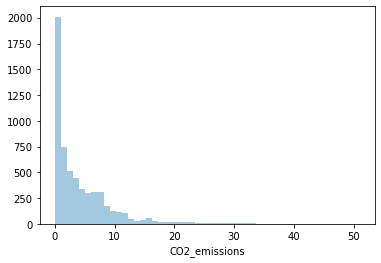

In [21]:
## 1) CO2_emissions

sns.distplot(df1['CO2_emissions'],kde=False);

In [22]:
## from the above histogram we noticed that many country recorded Zero in CO2_emissions. It is so weired

##Let's do further analysis


In [23]:
df1.sort_values(by='CO2_emissions',ascending=True)

,Country,country_code,Region,year,CO2_emissions
3943,Mali,MLI,Sub-Saharan Africa,1996,0.000000
3944,Mali,MLI,Sub-Saharan Africa,1997,0.000991
3942,Mali,MLI,Sub-Saharan Africa,1995,0.001043
3941,Mali,MLI,Sub-Saharan Africa,1994,0.001071
3940,Mali,MLI,Sub-Saharan Africa,1993,0.001100
...,...,...,...,...,...
5032,Qatar,QAT,Middle East & North Africa,2000,48.374002
5036,Qatar,QAT,Middle East & North Africa,2004,49.208051
5034,Qatar,QAT,Middle East & North Africa,2002,50.712155
5031,Qatar,QAT,Middle East & North Africa,1999,50.833850


In [24]:
## noticed that country like "Mali" record Zero CO2_emissions in 1996

In [25]:
## After reseach on CO2_emissions in Mali, we found that Mali produced around 0.05  tons per capita in 1996
         ##'https://countryeconomy.com/energy-and-environment/co2-emissions/mali?year=1996'
## So, Zero in this dataset entered by mistake
## I will drop it

In [26]:
df1.drop(index=[3943],inplace=True)

### Categorical Data

In [27]:
categorical_feature=df1.describe(include='O')
categorical_feature

,Country,country_code,Region,year
count,5894,5894,5894,5894
unique,191,191,7,31
top,Afghanistan,AFG,Europe & Central Asia,2005
freq,31,31,1550,191


##### 1) Region

In [28]:
df1['Region'].value_counts()    

Europe & Central Asia         1550
Sub-Saharan Africa            1482
Latin America & Caribbean     1023
East Asia & Pacific            912
Middle East & North Africa     617
South Asia                     248
North America                   62
Name: Region, dtype: int64

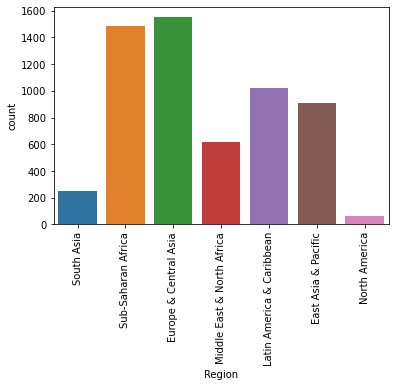

In [29]:
chart_region=sns.countplot(x=df1['Region'])
chart_region.set_xticklabels(chart_region.get_xticklabels(), rotation=90);

###### Region and CO2_emissions

In [30]:
df_sum=df1.groupby('Region')['CO2_emissions'].sum().sort_values().to_frame()
df_sum

,CO2_emissions
Region,
South Asia,184.748551
North America,1052.280538
Sub-Saharan Africa,1240.078014
Latin America & Caribbean,2933.786936
East Asia & Pacific,3852.255495
Middle East & North Africa,5737.506094
Europe & Central Asia,10414.012713


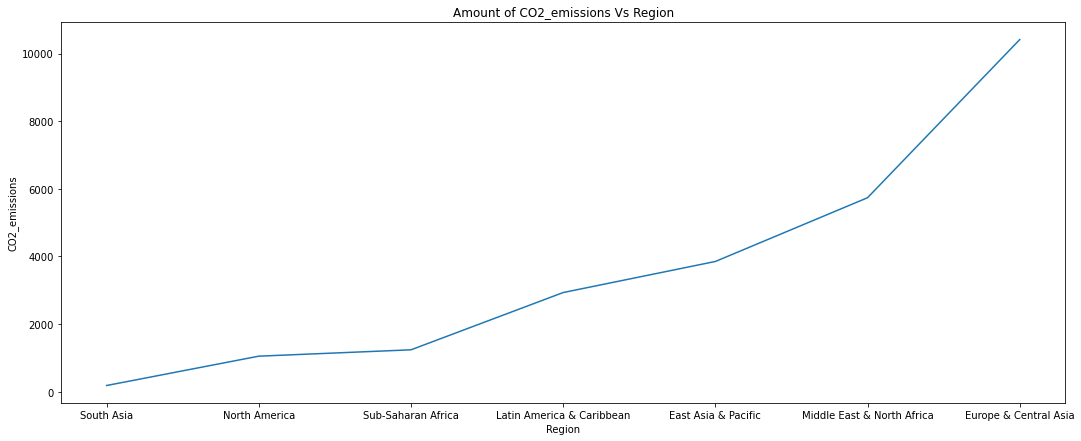

In [31]:
df_sum['CO2_emissions'].plot(y="Region", figsize=[18,7], title="Amount of CO2_emissions Vs Region", xlabel="Region", ylabel="CO2_emissions");
 

In [32]:
## The largest amount of CO2 emissions come from Europe & Central Asia then Middle East & North Africa
## The smallest amount come from South Asia

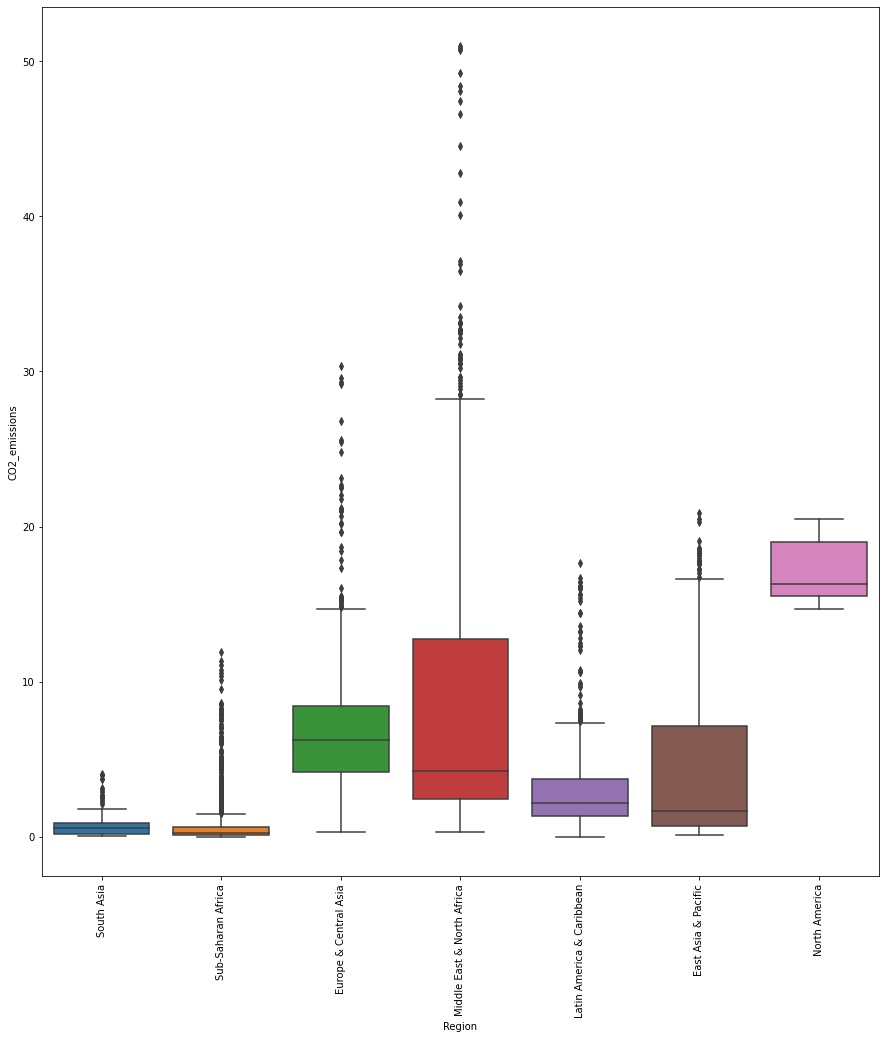

In [33]:
plt.figure(figsize=(15,16))
chart=sns.boxplot(x='Region',y='CO2_emissions',data=df1)
chart.set_xticklabels(chart.get_xticklabels(), rotation=90);


In [34]:
## Middle East & North Africa is the most region contain outliers 

#####  2) Country

In [35]:
df1['Country'].value_counts()

Afghanistan    31
New Zealand    31
Malawi         31
Malaysia       31
Niger          31
               ..
Palau          29
Eritrea        29
Mali           28
Kuwait         28
Timor-Leste    19
Name: Country, Length: 191, dtype: int64

###### Country and CO2 emissions

In [36]:
df1.groupby('Country')['CO2_emissions'].sum().sort_values(ascending=False).to_frame().head(30)

,CO2_emissions
Country,
Qatar,1183.479665
United Arab Emirates,771.017886
Bahrain,694.734161
Kuwait,668.307522
Luxembourg,662.097055
United States,559.215426
Australia,520.049076
Brunei Darussalam,497.990205
Canada,493.065113


In [37]:
## The Largest amount of CO2 come from Qatar, then United Arab Emirates, Bahrain, Kuwait maily from Gulf area

## Then Luxembourg, United States, Australia

In [38]:
df1.groupby(['Region','Country'])['CO2_emissions'].sum().sort_values(ascending=False).to_frame()

CO2_emissions
Region                     Country                                
Middle East & North Africa Qatar                       1183.479665
                           United Arab Emirates         771.017886
                           Bahrain                      694.734161
                           Kuwait                       668.307522
Europe & Central Asia      Luxembourg                   662.097055
...                                                            ...
Sub-Saharan Africa         Malawi                         2.056125
                           Somalia                        1.892018
                           Central African Republic       1.573580
                           Congo, Dem. Rep.               1.388137
                           Burundi                        1.110648

[191 rows x 1 columns]

###### 2) Year

In [39]:
df1['year'].value_counts()

2005      191
2006      191
2019      191
2018      191
2017      191
2016      191
2015      191
2014      191
2013      191
2012      191
2011      191
2010      191
2009      191
2008      191
2007      191
2019.1    191
2004      191
2003      191
2002      191
2001      190
2000      190
1997      190
1995      190
1999      189
1998      189
1996      189
1994      189
1993      189
1992      189
1991      186
1990      185
Name: year, dtype: int64

###### Years vs CO2 emissions 

In [40]:
year_co2=df1.groupby('year')['CO2_emissions'].sum().sort_values(ascending=False).to_frame()
year_co2

,CO2_emissions
year,
2009,885.548641
2006,876.729648
2007,870.712933
2008,865.715065
2005,864.438134
2004,860.546138
2003,853.169098
2012,848.116218
2010,840.295443


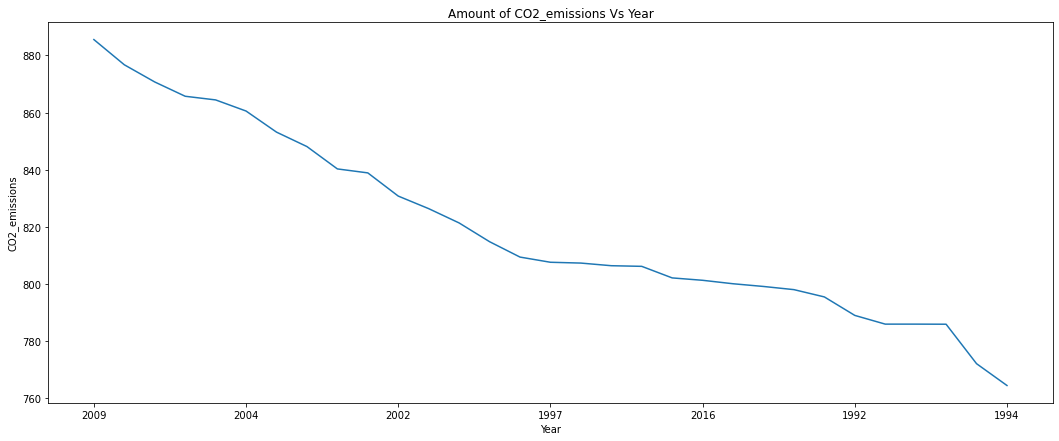

In [41]:
year_co2['CO2_emissions'].plot(y="CO2_emissions", figsize=[18,7], title="Amount of CO2_emissions Vs Year", xlabel="Year", ylabel="CO2_emissions");
 

In [42]:
## The largest amount of CO2 emission was produced in 2009

In [43]:
df1.groupby(['Region','Country','year'])['CO2_emissions'].sum().sort_values(ascending=False).to_frame()

CO2_emissions
Region                     Country year               
Middle East & North Africa Qatar   2003      50.954034
                                   1999      50.833850
                                   2002      50.712155
                                   2004      49.208051
                                   2000      48.374002
...                                                ...
Sub-Saharan Africa         Mali    1992       0.001130
                                   1993       0.001100
                                   1994       0.001071
                                   1995       0.001043
                                   1997       0.000991

[5894 rows x 1 columns]

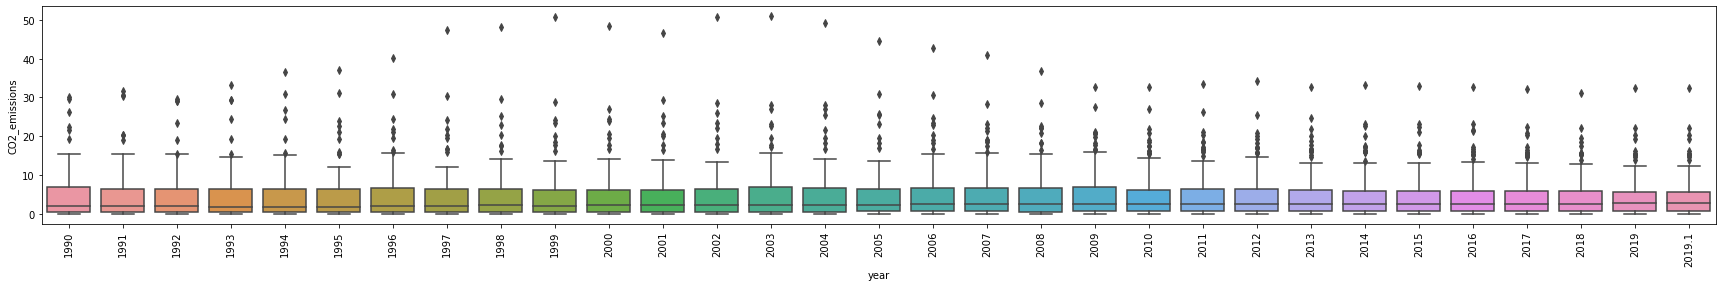

In [44]:
plt.figure(figsize=(30,4))
chart=sns.boxplot(x='year',y='CO2_emissions',data=df1);
chart.set_xticklabels(chart.get_xticklabels(), rotation=90);


In [45]:
## CO2 emissions increased between 1996 and 2007

## More analysis for each Region

In [46]:
df_sum

,CO2_emissions
Region,
South Asia,184.748551
North America,1052.280538
Sub-Saharan Africa,1240.078014
Latin America & Caribbean,2933.786936
East Asia & Pacific,3852.255495
Middle East & North Africa,5737.506094
Europe & Central Asia,10414.012713


###### 1- Europe Central Asia "Largest amount of CO2 emissions"

In [47]:
df_country= df1.groupby('Region').get_group('Europe & Central Asia')
df_country

,Country,country_code,Region,year,CO2_emissions
93,Albania,ALB,Europe & Central Asia,1990,1.819542
94,Albania,ALB,Europe & Central Asia,1991,1.242810
95,Albania,ALB,Europe & Central Asia,1992,0.683700
96,Albania,ALB,Europe & Central Asia,1993,0.638307
97,Albania,ALB,Europe & Central Asia,1994,0.645355
...,...,...,...,...,...
6319,Uzbekistan,UZB,Europe & Central Asia,2016,3.304143
6320,Uzbekistan,UZB,Europe & Central Asia,2017,3.381745
6321,Uzbekistan,UZB,Europe & Central Asia,2018,3.412722
6322,Uzbekistan,UZB,Europe & Central Asia,2019,3.475544


In [48]:
def region(Region):
    for Country in df_country:
        x= df_country['Country'].value_counts()
        df_country1=df_country.groupby(['Country'])['CO2_emissions'].sum().sort_values(ascending=False).to_frame()
        chart=df_country1['CO2_emissions'].plot(y="CO2_emissions", figsize=[18,7], title="Amount of CO2_emissions Vs Europe & Central Asia Countries", xlabel="Europe & Central Asia Countries", ylabel="CO2_emissions");
        plt.show()
        df_country2=df_country.groupby(['year'])['CO2_emissions'].sum().to_frame()
        df_country3=df_country.groupby(['Country','year'])['CO2_emissions'].sum().sort_values(ascending=False)
        chart2=df_country2['CO2_emissions'].plot(y="CO2_emissions", figsize=[18,7], title="Amount of CO2_emissions Vs year", xlabel="year", ylabel="CO2_emissions");
        plt.show()
        largest_country=df_country.groupby('Country')["CO2_emissions"].sum().nlargest(5)
        largest_country_chart=largest_country.plot(x='year',y="CO2_emissions", figsize=[18,7], title="The top 5 countries in CO2 emission", xlabel="Country", ylabel="CO2_emissions");
        plt.show()
        smallest_country=df_country.groupby('Country')["CO2_emissions"].sum().nsmallest(5)
        largest_country_chart=smallest_country.plot(x='year',y="CO2_emissions", figsize=[18,7], title="The less 5 countries in CO2 emission", xlabel="Country", ylabel="CO2_emissions");
        plt.show()
        return x,'____________________________',df_country1,'____________________________',df_country2,'____________________________',df_country3,'____________________________',largest_country_chart,chart,chart2

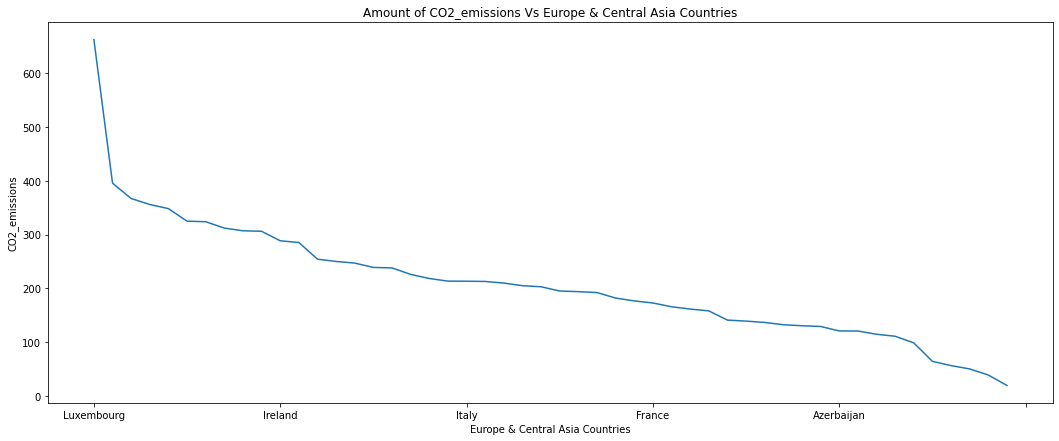

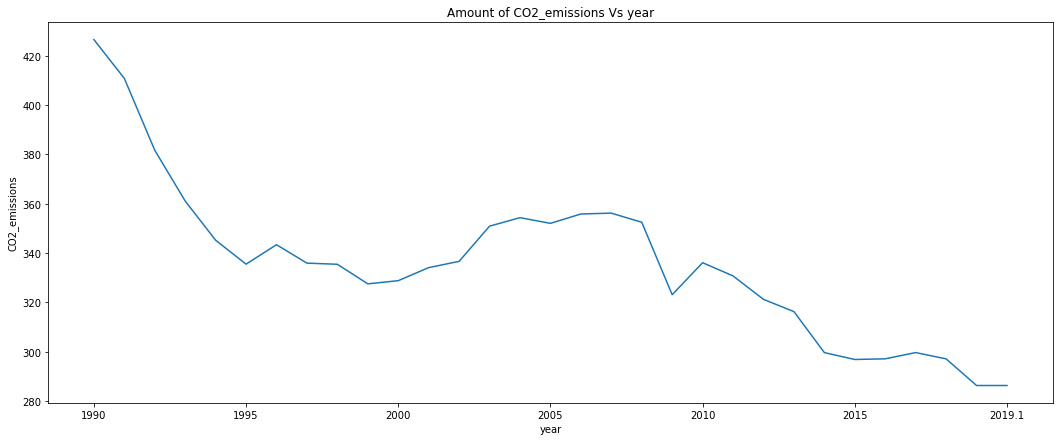

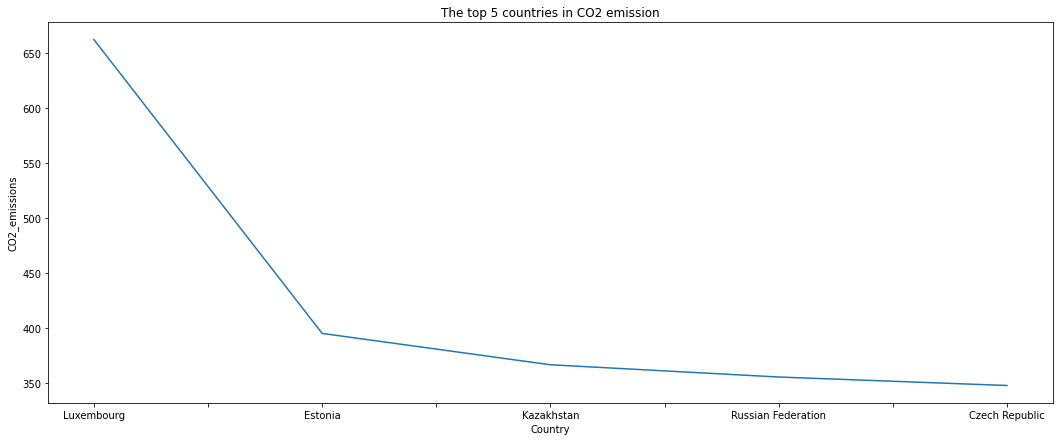

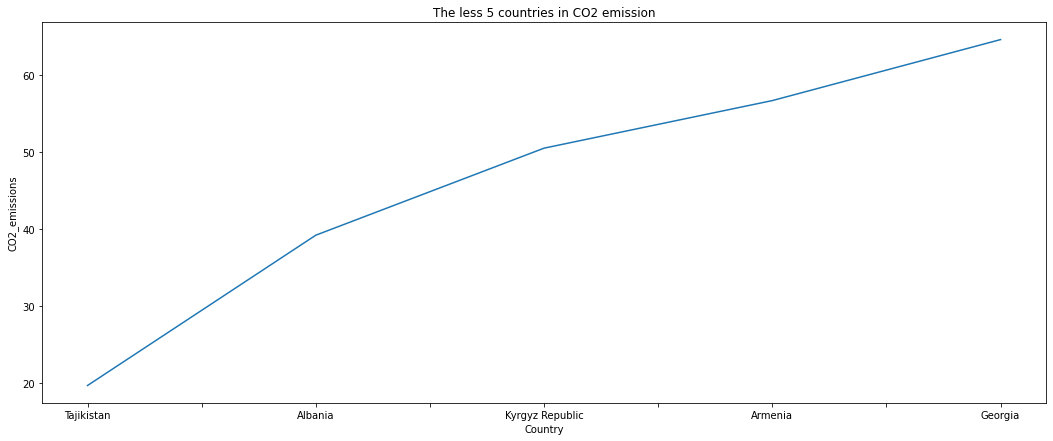

(Albania                   31
 Poland                    31
 Kyrgyz Republic           31
 Liechtenstein             31
 Lithuania                 31
 Luxembourg                31
 Latvia                    31
 Moldova                   31
 North Macedonia           31
 Montenegro                31
 Netherlands               31
 Norway                    31
 Portugal                  31
 Andorra                   31
 Romania                   31
 Russian Federation        31
 Serbia                    31
 Slovak Republic           31
 Slovenia                  31
 Sweden                    31
 Tajikistan                31
 Turkmenistan              31
 Turkiye                   31
 Ukraine                   31
 Kazakhstan                31
 Italy                     31
 Iceland                   31
 Ireland                   31
 Armenia                   31
 Austria                   31
 Azerbaijan                31
 Belgium                   31
 Bulgaria                  31
 Bosnia an

In [49]:
region('Europe & Central Asia')

##### Observations about Europe Central Asia:
- CO2 emission is recorded in all years in this region.
- The largest amount of CO2 produced in 1990 and over the years most of times this amount is decreased due to the world awearness with greenhouse gas problems.
- The largest country produced CO2 emissions is Luxembourg with a big different from other countries in this region, This reflects the very high incomes, spending power of this country, large amount of trucks passing through Luxembourg and the country's high dependency on imported fossil fuels
- Estonia is the second country in CO2 emissions because burning of fossil fuels, cement manufacture and deforestation.


https://today.rtl.lu/news/luxembourg/a/1184731.html

###### 2- Middle East & North Africa

In [93]:
df_country= df1.groupby('Region').get_group('Middle East & North Africa')
df_country

,Country,country_code,Region,year,CO2_emissions
155,United Arab Emirates,ARE,Middle East & North Africa,1990,30.195189
156,United Arab Emirates,ARE,Middle East & North Africa,1991,31.778496
157,United Arab Emirates,ARE,Middle East & North Africa,1992,29.080926
158,United Arab Emirates,ARE,Middle East & North Africa,1993,29.275678
159,United Arab Emirates,ARE,Middle East & North Africa,1994,30.849333
...,...,...,...,...,...
6567,"Yemen, Rep.",YEM,Middle East & North Africa,2016,0.399364
6568,"Yemen, Rep.",YEM,Middle East & North Africa,2017,0.359622
6569,"Yemen, Rep.",YEM,Middle East & North Africa,2018,0.341068
6570,"Yemen, Rep.",YEM,Middle East & North Africa,2019,0.380633


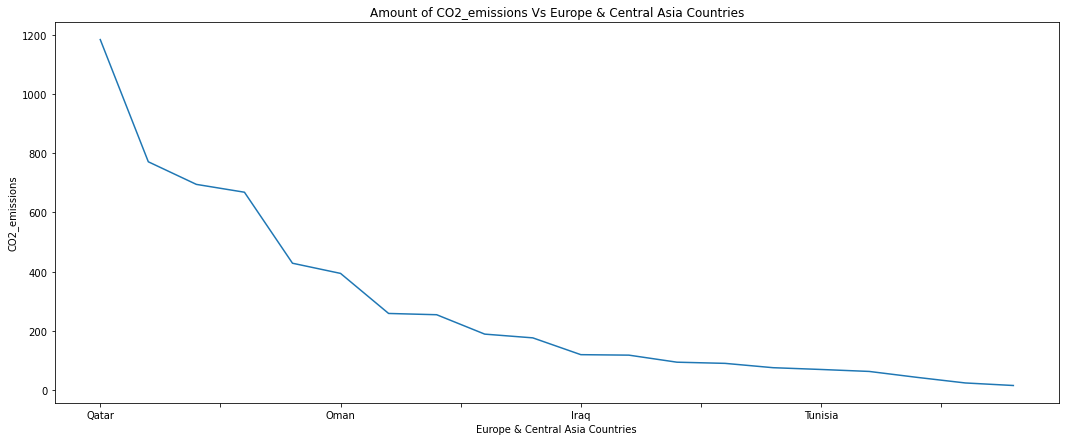

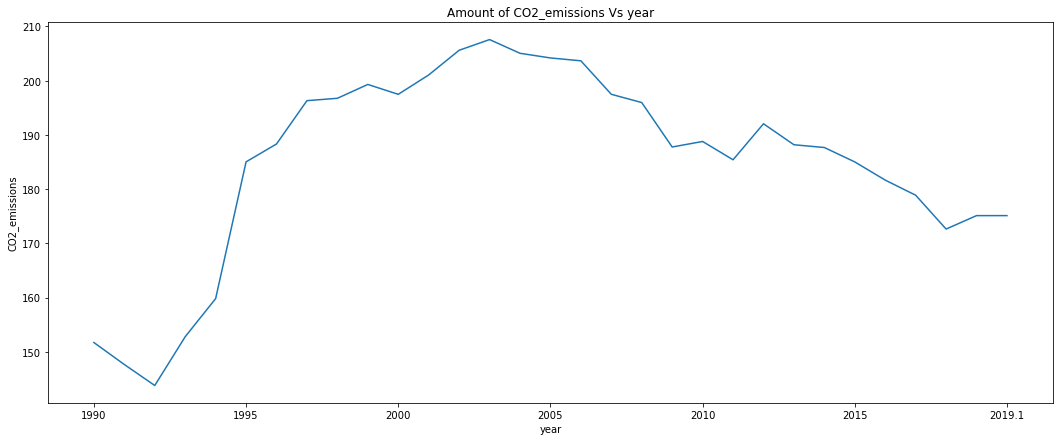

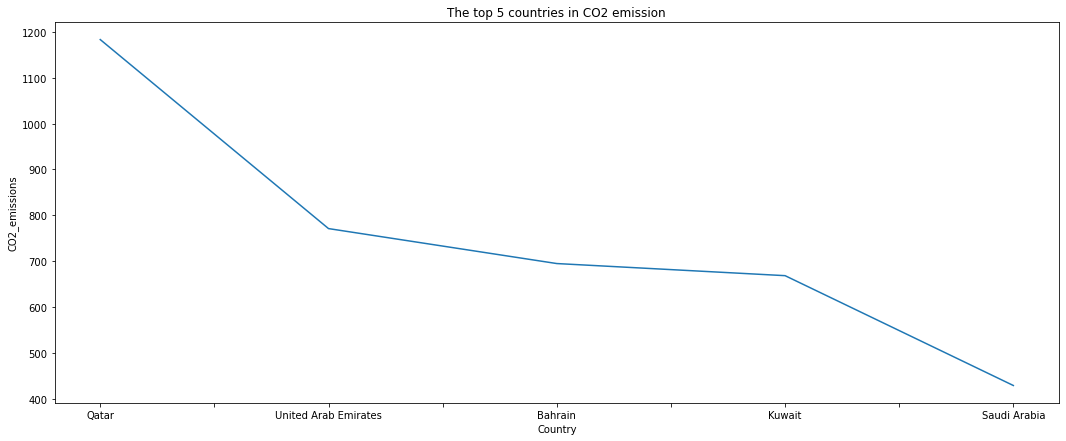

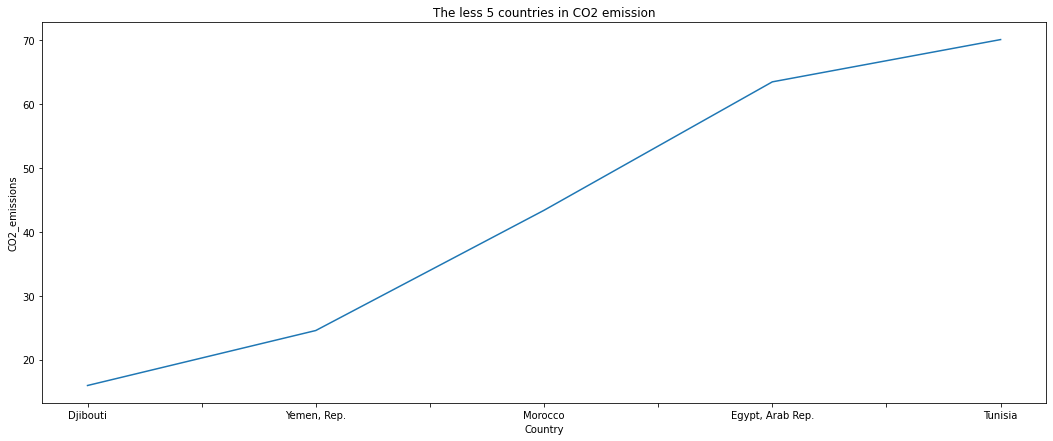

(United Arab Emirates    31
 Bahrain                 31
 Tunisia                 31
 Syrian Arab Republic    31
 Saudi Arabia            31
 Qatar                   31
 Oman                    31
 Malta                   31
 Morocco                 31
 Libya                   31
 Lebanon                 31
 Jordan                  31
 Israel                  31
 Iraq                    31
 Iran, Islamic Rep.      31
 Egypt, Arab Rep.        31
 Algeria                 31
 Djibouti                31
 Yemen, Rep.             31
 Kuwait                  28
 Name: Country, dtype: int64,
 '____________________________',
                       CO2_emissions
 Country                            
 Qatar                   1183.479665
 United Arab Emirates     771.017886
 Bahrain                  694.734161
 Kuwait                   668.307522
 Saudi Arabia             428.619004
 Oman                     394.278376
 Israel                   259.099550
 Libya                    254.823345
 Iran, 

In [51]:
region('Middle East & North Africa')

##### Observations about Middle East & North Africa
- Most of countries in this region record CO2 emission in all years except "Kuwait".
- The largest amount of CO2 emission come from Gulf countries. So, we will do further investigation to know if oil and natural gas is the reason for increasing CO2 emission or not.

- The largest amount of CO2 emission come frome Qatar due to Qatar is the largest LNG "Liqued natural gas" producer and Qatar has a relatively small population when compared to other countries. Qatar is a developing country.
- it is the largest LNG exporter and it has third highest natural gas reserves in the world.
"https://www.qscience.com/content/papers/10.5339/qfarc.2018.EEPD592"


- The second country is United Arab Emirates which is world’s third-largest oil exporter 'https://www.reuters.com/article/us-emirates-sustainability-factbox-idUSTRE69C5FQ20101013'

- However Kuwait is not recorded co2 emission in all years, it is the third country in this region. This is due to the oil industry, with the burning of fossil fuels, alongside the extraction, drilling and fracking, storing and exporting all being the largest causes of pollution in the country. 
'https://www.iqair.com/kuwait'

- Also, we noticed that over the years amount of CO2 increased because most of this countries is developing countries and begine to develop without interest in controlling air pollutants


###### From the above the main reasons for increasing co2 in this region is Extracting of petroleum and its derivatives

###### 3- East Asia & Pacific

In [94]:
df_country= df1.groupby('Region').get_group('East Asia & Pacific')
df_country

,Country,country_code,Region,year,CO2_emissions
310,Australia,AUS,East Asia & Pacific,1990,15.448488
311,Australia,AUS,East Asia & Pacific,1991,15.318213
312,Australia,AUS,East Asia & Pacific,1992,15.341526
313,Australia,AUS,East Asia & Pacific,1993,15.455369
314,Australia,AUS,East Asia & Pacific,1994,15.691963
...,...,...,...,...,...
6536,Samoa,WSM,East Asia & Pacific,2016,1.542099
6537,Samoa,WSM,East Asia & Pacific,2017,1.586830
6538,Samoa,WSM,East Asia & Pacific,2018,1.478626
6539,Samoa,WSM,East Asia & Pacific,2019,1.522124


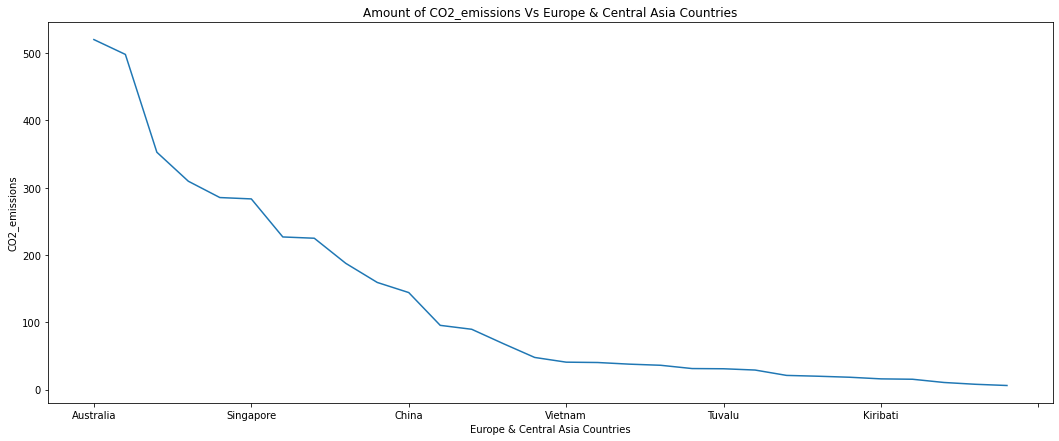

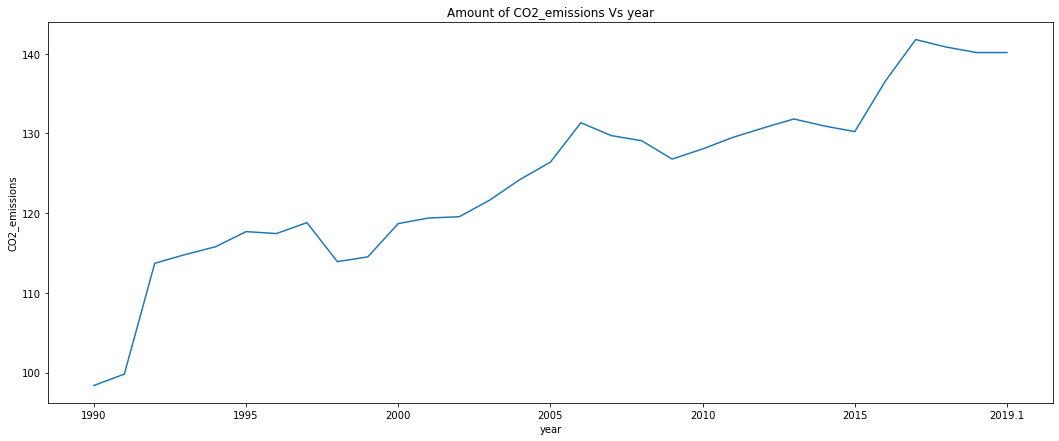

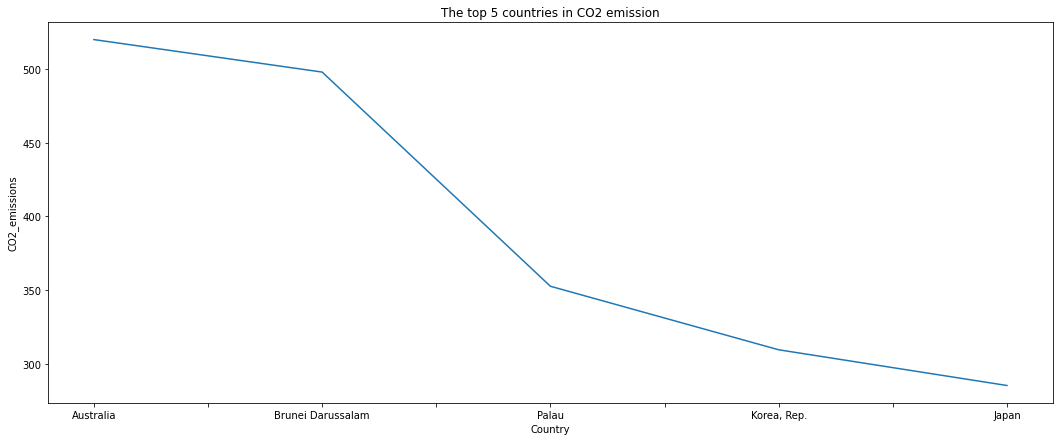

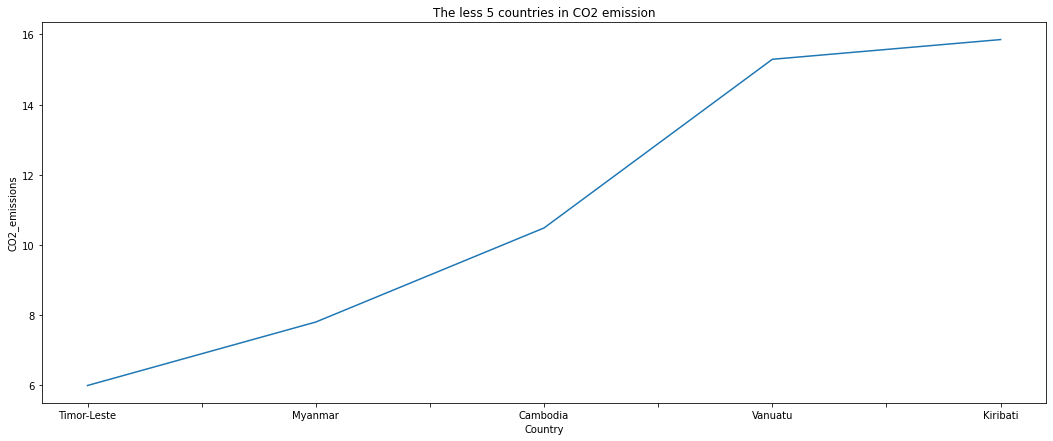

(Australia                    31
 Malaysia                     31
 Vanuatu                      31
 Vietnam                      31
 Tuvalu                       31
 Tonga                        31
 Thailand                     31
 Solomon Islands              31
 Singapore                    31
 Korea, Dem. People's Rep.    31
 Papua New Guinea             31
 Philippines                  31
 New Zealand                  31
 Brunei Darussalam            31
 Nauru                        31
 Mongolia                     31
 Myanmar                      31
 Lao PDR                      31
 Korea, Rep.                  31
 Kiribati                     31
 Cambodia                     31
 Japan                        31
 Indonesia                    31
 Fiji                         31
 China                        31
 Samoa                        31
 Marshall Islands             29
 Palau                        29
 Micronesia, Fed. Sts.        29
 Timor-Leste                  19
 Name: Cou

In [53]:
region('East Asia & Pacific')

##### Observations about East Asia & Pacific
- The different in CO2 emission between the highest 2 countries is small. 

- Over the years CO2 emissions is increasing  

- Not all countries recorded CO2 emission in all years.

- The largest amount of CO2 come from Australia due to burning fossil fuels to produce electricity
'https://www.csiro.au/en/research/environmental-impacts/climate-change/climate-change-qa/sources-of-ghg-gases#:~:text=Energy%20production%20is%20the%20largest,cent%20of%20the%20total%20emissions'

- The secound country is Brunei because, Brunei’s economy is almost totally dependent on the exploitation of its vast reserves of petroleum and natural gas. Consequently, emissions from the production, processing and transport of oil and natural gas represent an important source of CO2 emissions in the country.
'https://www4.unfccc.int/sites/SubmissionsStaging/NationalReports/Documents/8560731_Brunei%20Darussalam-NC2-1-Brunei%20Darussalam%20Second%20National%20Communication_5%20Nov%202017.pdf'
'https://www.britannica.com/place/Brunei'

- However China  is the largest industrial country in the world, but the amount of CO2 emission is not large when compared with petroleum producing countries   


###### 4- Latin America & Caribbean

In [54]:
df_country= df1.groupby('Region').get_group('Latin America & Caribbean')
df_country

,Country,country_code,Region,year,CO2_emissions
186,Argentina,ARG,Latin America & Caribbean,1990,3.075541
187,Argentina,ARG,Latin America & Caribbean,1991,3.202031
188,Argentina,ARG,Latin America & Caribbean,1992,3.218974
189,Argentina,ARG,Latin America & Caribbean,1993,3.245795
190,Argentina,ARG,Latin America & Caribbean,1994,3.252945
...,...,...,...,...,...
6381,"Venezuela, RB",VEN,Latin America & Caribbean,2016,5.060760
6382,"Venezuela, RB",VEN,Latin America & Caribbean,2017,4.789392
6383,"Venezuela, RB",VEN,Latin America & Caribbean,2018,4.574011
6384,"Venezuela, RB",VEN,Latin America & Caribbean,2019,3.939566


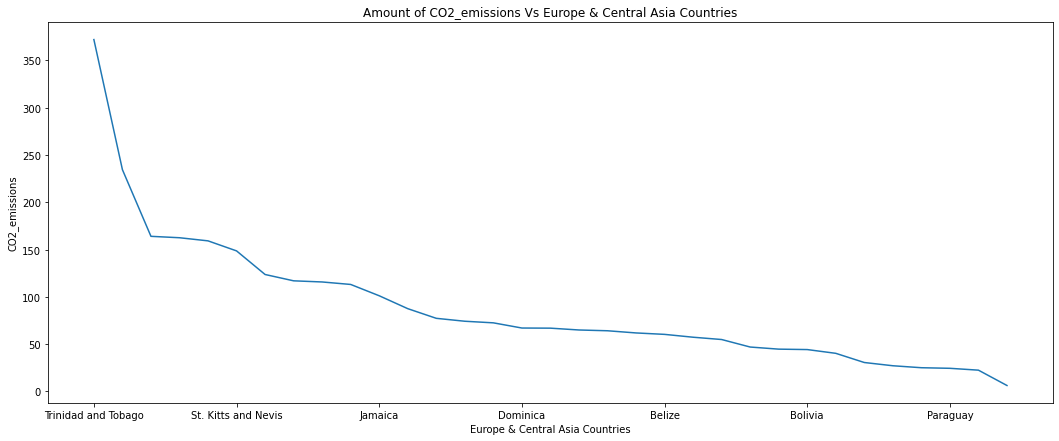

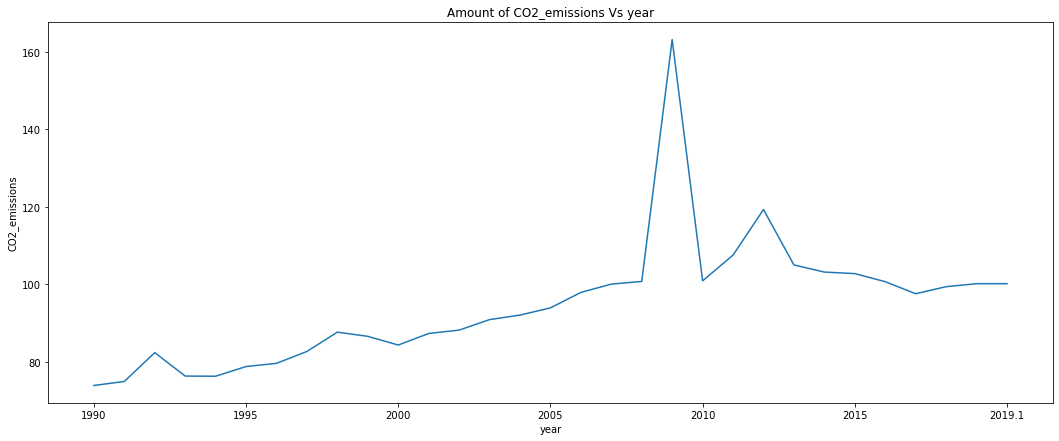

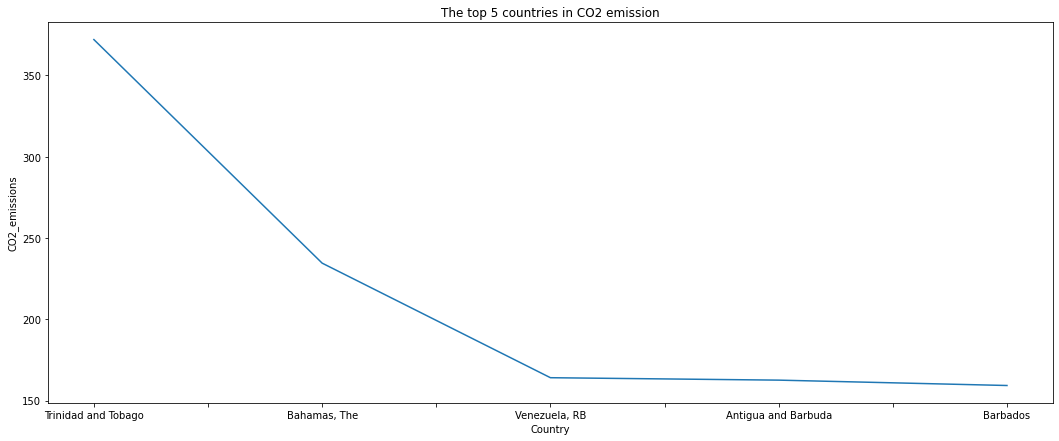

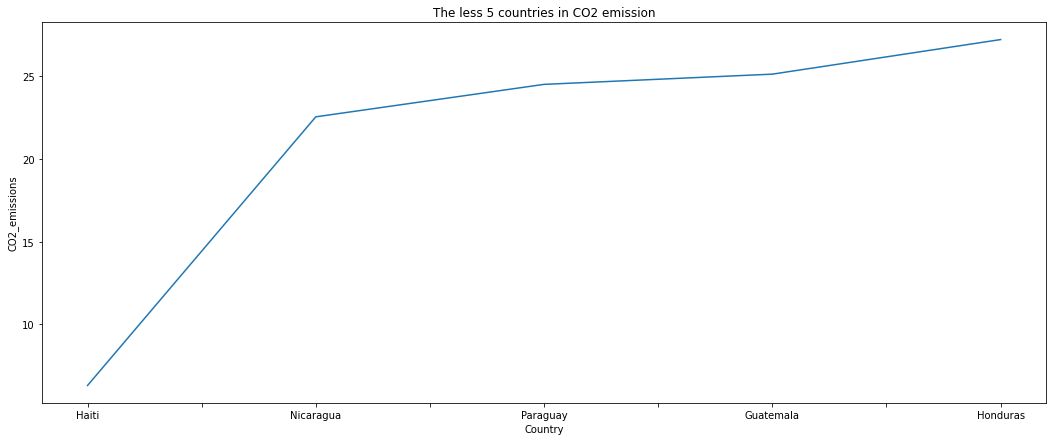

(Argentina                         31
 Honduras                          31
 St. Vincent and the Grenadines    31
 Uruguay                           31
 Trinidad and Tobago               31
 Suriname                          31
 El Salvador                       31
 Paraguay                          31
 Peru                              31
 Panama                            31
 Nicaragua                         31
 Mexico                            31
 St. Lucia                         31
 St. Kitts and Nevis               31
 Jamaica                           31
 Haiti                             31
 Guyana                            31
 Antigua and Barbuda               31
 Guatemala                         31
 Grenada                           31
 Ecuador                           31
 Dominican Republic                31
 Dominica                          31
 Cuba                              31
 Costa Rica                        31
 Colombia                          31
 Chile      

In [55]:
region('Latin America & Caribbean')

###### Observations about Latin America & Caribbean
- All countries recorded CO2 emission in all years.
 
- The Largest amount of CO2 emissions come from Trinidad and Tobago due to the energy sector through petrochemical production, power generation and flaring.
- Also from the manufacture of cement

- The largest amount of CO2 produced between 2007-2010 due to increasing in Economic growth in many countries.


###### 5- Sub-Saharan Afric

In [56]:
df_country= df1.groupby('Region').get_group('Sub-Saharan Africa')
df_country

,Country,country_code,Region,year,CO2_emissions
62,Angola,AGO,Sub-Saharan Africa,1990,0.553662
63,Angola,AGO,Sub-Saharan Africa,1991,0.544539
64,Angola,AGO,Sub-Saharan Africa,1992,0.543557
65,Angola,AGO,Sub-Saharan Africa,1993,0.708984
66,Angola,AGO,Sub-Saharan Africa,1994,0.836804
...,...,...,...,...,...
6660,Zimbabwe,ZWE,Sub-Saharan Africa,2016,0.785441
6661,Zimbabwe,ZWE,Sub-Saharan Africa,2017,0.726297
6662,Zimbabwe,ZWE,Sub-Saharan Africa,2018,0.857411
6663,Zimbabwe,ZWE,Sub-Saharan Africa,2019,0.802979


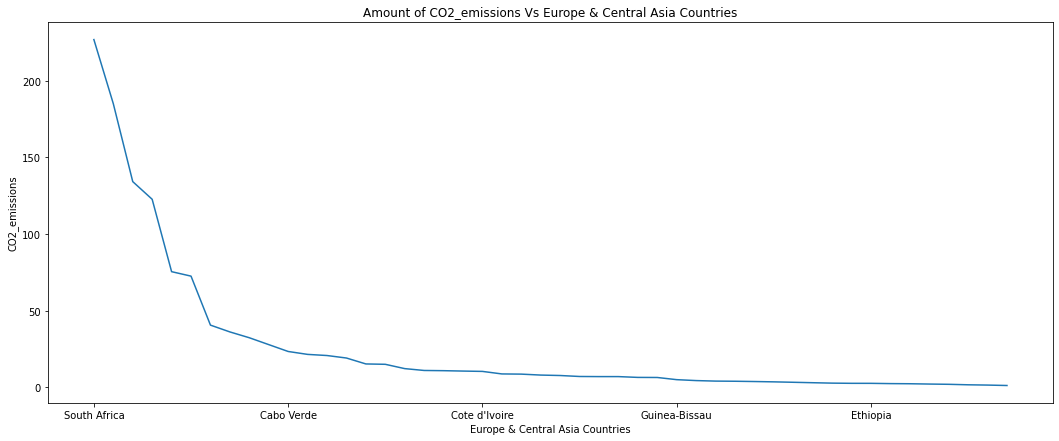

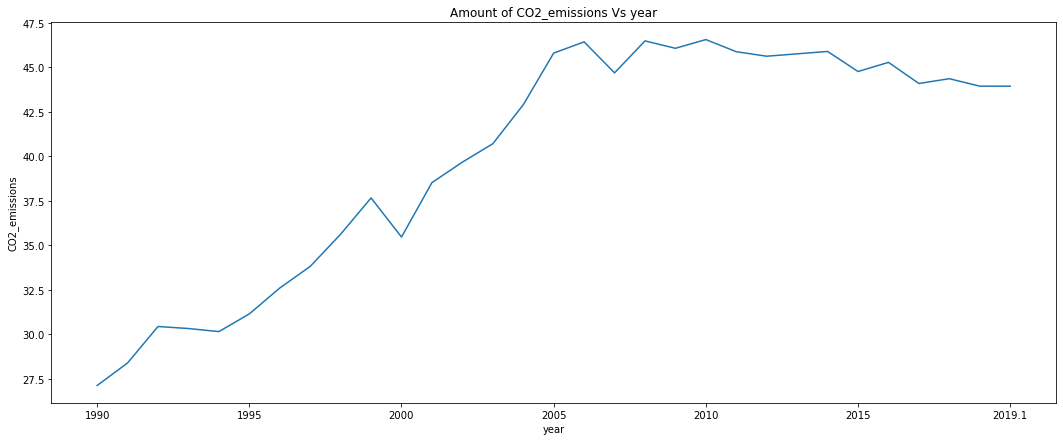

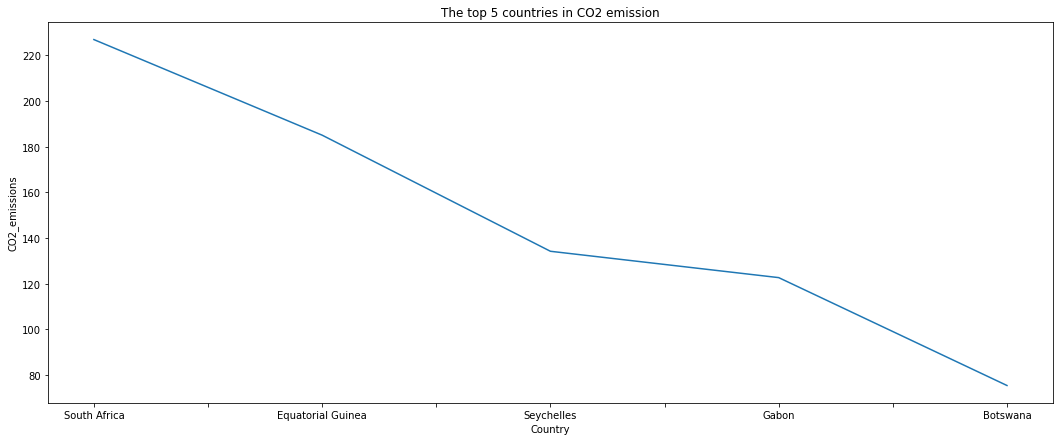

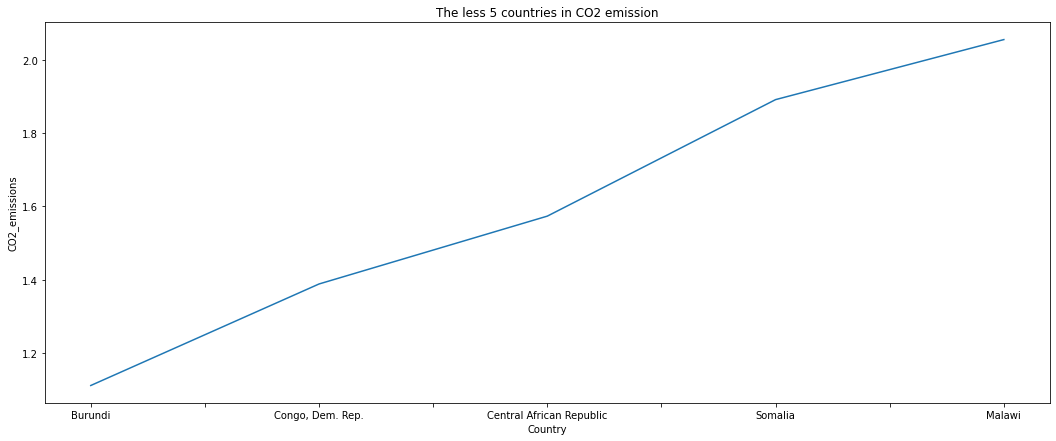

(Angola                      31
 Somalia                     31
 Mauritania                  31
 Mauritius                   31
 Malawi                      31
 Niger                       31
 Nigeria                     31
 Rwanda                      31
 Sudan                       31
 Senegal                     31
 Sierra Leone                31
 South Sudan                 31
 Burundi                     31
 Sao Tome and Principe       31
 Eswatini                    31
 Seychelles                  31
 Chad                        31
 Togo                        31
 Tanzania                    31
 Uganda                      31
 South Africa                31
 Zambia                      31
 Mozambique                  31
 Zimbabwe                    31
 Madagascar                  31
 Benin                       31
 Botswana                    31
 Central African Republic    31
 Cote d'Ivoire               31
 Cameroon                    31
 Congo, Dem. Rep.            31
 Congo, 

In [57]:
region('Sub-Saharan Africa')

###### Observations about South Africa
- Most of countries in this region recorded CO2 emission in all years except 3 countries
- The largest amont of CO2 come from South Africa due to a heavy reliance on coal
- Amount of CO2 increasing over the years 

###### 6- North America

In [58]:
df_country= df1.groupby('Region').get_group('North America')
df_country

,Country,country_code,Region,year,CO2_emissions
992,Canada,CAN,North America,1990,15.148890
993,Canada,CAN,North America,1991,14.741014
994,Canada,CAN,North America,1992,15.028234
995,Canada,CAN,North America,1993,14.713386
996,Canada,CAN,North America,1994,15.060345
...,...,...,...,...,...
6288,United States,USA,North America,2016,15.149885
6289,United States,USA,North America,2017,14.823261
6290,United States,USA,North America,2018,15.222548
6291,United States,USA,North America,2019,14.673411


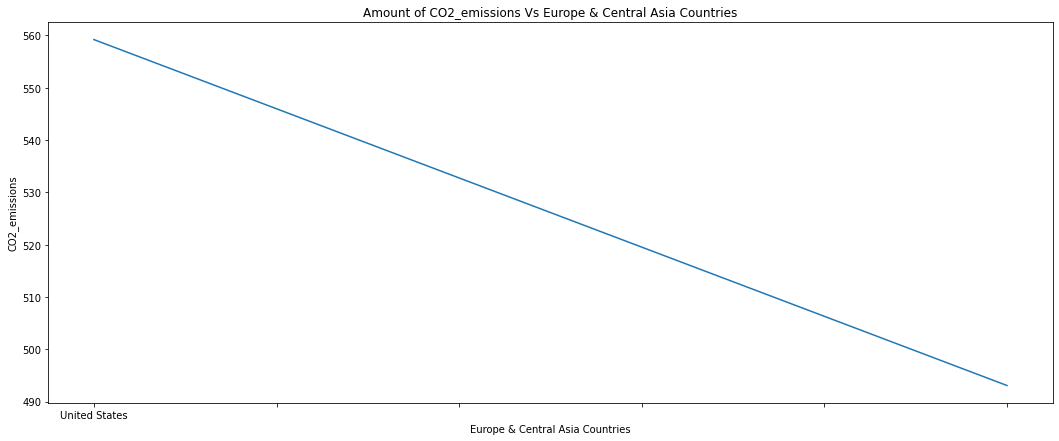

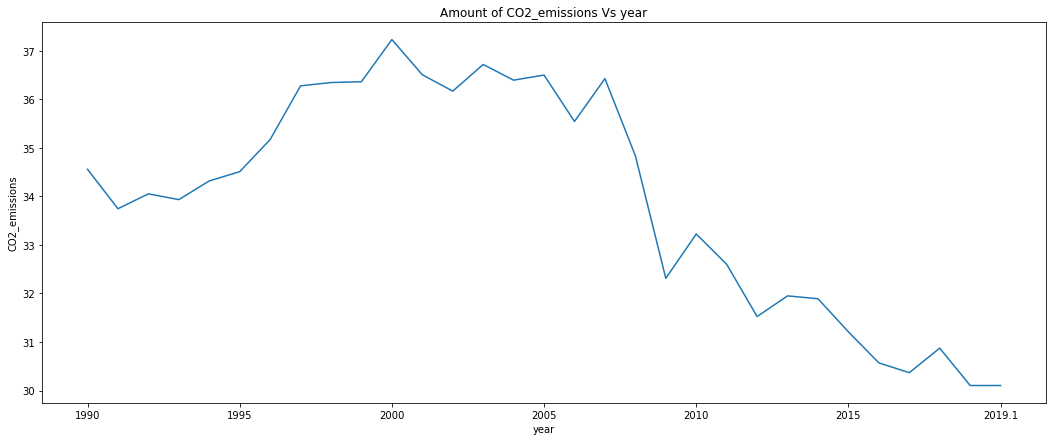

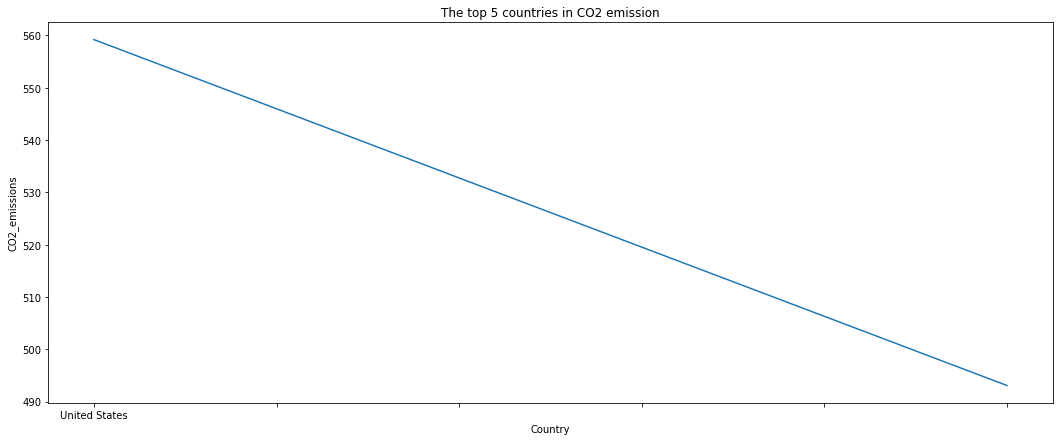

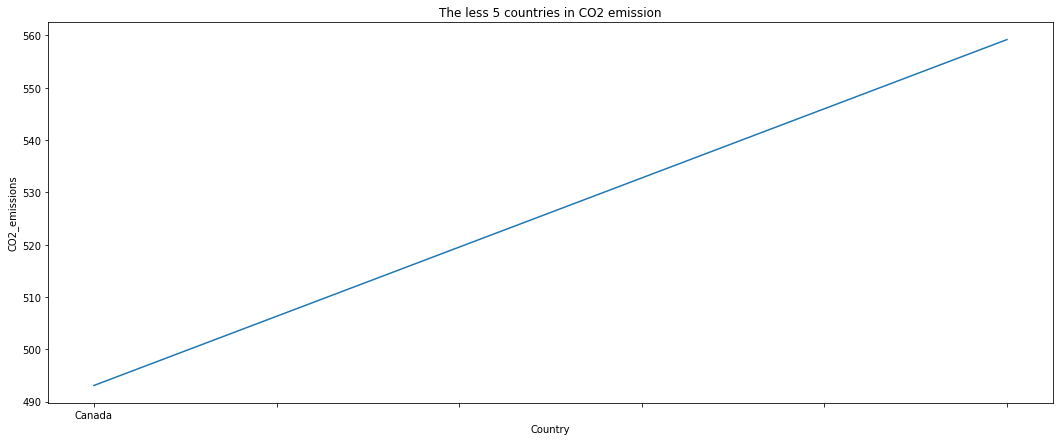

(Canada           31
 United States    31
 Name: Country, dtype: int64,
 '____________________________',
                CO2_emissions
 Country                     
 United States     559.215426
 Canada            493.065113,
 '____________________________',
         CO2_emissions
 year                 
 1990        34.556236
 1991        33.744417
 1992        34.051095
 1993        33.931719
 1994        34.316557
 1995        34.507511
 1996        35.167971
 1997        36.274841
 1998        36.342812
 1999        36.359655
 2000        37.227433
 2001        36.503100
 2002        36.165850
 2003        36.714801
 2004        36.391900
 2005        36.496748
 2006        35.541264
 2007        36.423484
 2008        34.835417
 2009        32.310844
 2010        33.223880
 2011        32.600162
 2012        31.524257
 2013        31.949645
 2014        31.890826
 2015        31.208621
 2016        30.570487
 2017        30.367832
 2018        30.873127
 2019        30.104023
 2019

In [59]:
region('North America')

###### Observations about  North America
- Both countries are very development countries and the different between them is very small.

- Most amount of CO2 emission in USA come from burning of fossil fuels like coal, natural gas and oil. The remainder results from the clearing of forests and other land use changes, as well as some industrial processes such as cement manufacturing.
'https://whatsyourimpact.org/greenhouse-gases/carbon-dioxide-emissions'

- In Canada Eating meat, using fossil fuel cars, flying, and living in large houses with high energy consumption are all highlighted in the report as lifestyle choices that contribute to larger CO2 emission
'https://www.cbc.ca/news/science/how-canadians-can-cut-carbon-footprints-1.6202194'

###### 7- South Asia

In [60]:
df_country= df1.groupby('Region').get_group('South Asia')
df_country

,Country,country_code,Region,year,CO2_emissions
31,Afghanistan,AFG,South Asia,1990,0.191745
32,Afghanistan,AFG,South Asia,1991,0.167682
33,Afghanistan,AFG,South Asia,1992,0.095958
34,Afghanistan,AFG,South Asia,1993,0.084721
35,Afghanistan,AFG,South Asia,1994,0.075546
...,...,...,...,...,...
4645,Pakistan,PAK,South Asia,2016,0.889401
4646,Pakistan,PAK,South Asia,2017,0.956345
4647,Pakistan,PAK,South Asia,2018,0.882587
4648,Pakistan,PAK,South Asia,2019,0.879965


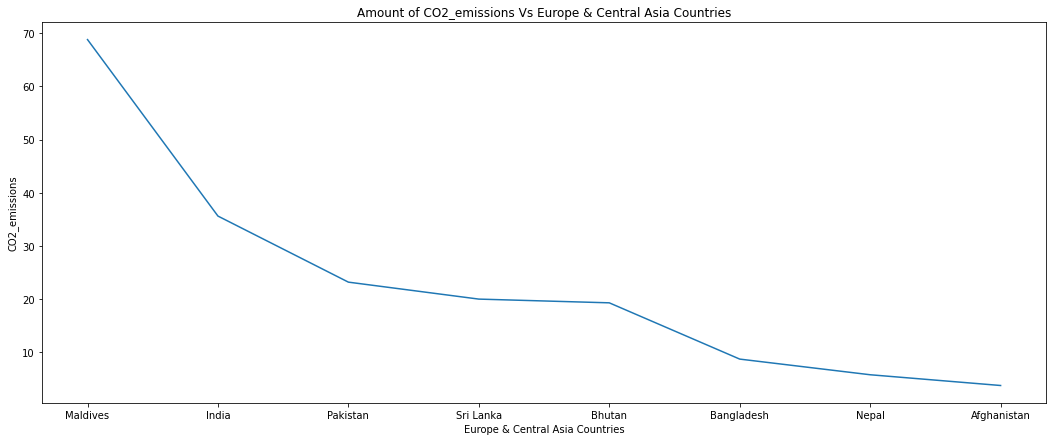

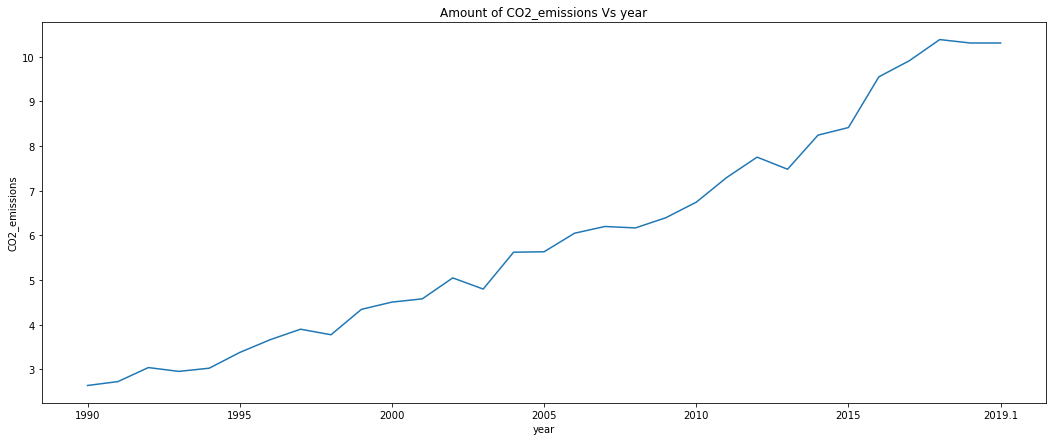

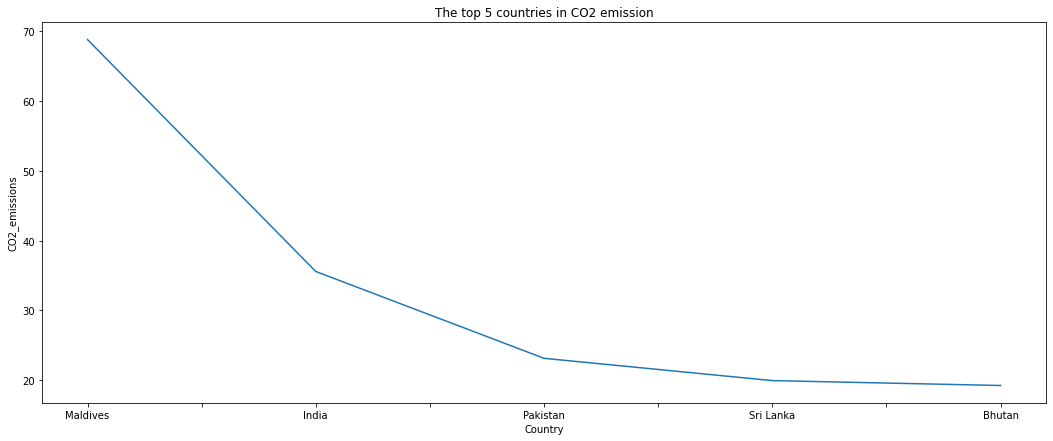

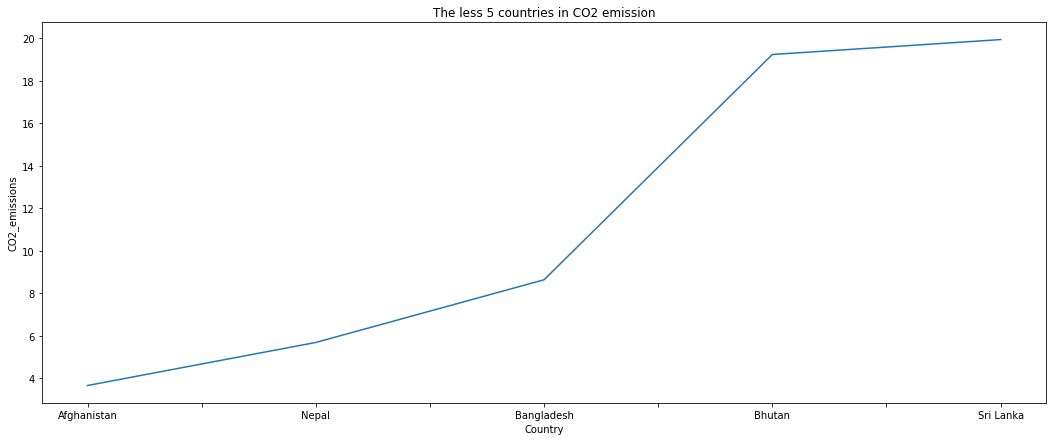

(Afghanistan    31
 Bangladesh     31
 Bhutan         31
 India          31
 Sri Lanka      31
 Maldives       31
 Nepal          31
 Pakistan       31
 Name: Country, dtype: int64,
 '____________________________',
              CO2_emissions
 Country                   
 Maldives         68.836409
 India            35.586623
 Pakistan         23.139032
 Sri Lanka        19.943970
 Bhutan           19.241581
 Bangladesh        8.642037
 Nepal             5.692217
 Afghanistan       3.666681,
 '____________________________',
         CO2_emissions
 year                 
 1990         2.636176
 1991         2.723893
 1992         3.037818
 1993         2.952127
 1994         3.023854
 1995         3.375510
 1996         3.661086
 1997         3.896621
 1998         3.772312
 1999         4.341482
 2000         4.503187
 2001         4.576268
 2002         5.045680
 2003         4.795436
 2004         5.620844
 2005         5.630202
 2006         6.045115
 2007         6.196805
 2008      

In [61]:
region('South Asia')

In [62]:
df1.to_csv('CO2.csv')

###### Observations about  South Asia
- Most of CO2 emission in Maldives result from the tourism, transportation, and energy sectors.

###### Conclusion from the above  most of CO2 emission result from  extracting  and burning of fossil fuels
### Let's check other factors like population and GDP that may be effect on CO2 emission
- So, we support our analysis with other source of data to know more information about GPD and Population for countries
https://www.kaggle.com/datasets/lobosi/c02-emission-by-countrys-grouth-and-population 


In [72]:
gpd=pd.read_csv('energy_GPD.csv')
gpd.head()

,Unnamed: 0,Country,Energy_type,Year,Energy_consumption,Energy_production,GDP,Population,Energy_intensity_per_capita,Energy_intensity_by_GDP,CO2_emission
0,0,World,all_energy_types,1980,292.899790,296.337228,27770.910281,4.298127e+06,68.145921,10.547,4946.627130
1,1,World,coal,1980,78.656134,80.114194,27770.910281,4.298127e+06,68.145921,10.547,1409.790188
2,2,World,natural_gas,1980,53.865223,54.761046,27770.910281,4.298127e+06,68.145921,10.547,1081.593377
3,3,World,petroleum_n_other_liquids,1980,132.064019,133.111109,27770.910281,4.298127e+06,68.145921,10.547,2455.243565
4,4,World,nuclear,1980,7.575700,7.575700,27770.910281,4.298127e+06,68.145921,10.547,0.000000


In [73]:
GPD=gpd[['Country','Year', 'Population','GDP','Energy_intensity_per_capita']]
GPD.rename(columns={'Year':'year'},inplace=True)
GPD

,Country,year,Population,GDP,Energy_intensity_per_capita
0,World,1980,4.298127e+06,27770.910281,68.145921
1,World,1980,4.298127e+06,27770.910281,68.145921
2,World,1980,4.298127e+06,27770.910281,68.145921
3,World,1980,4.298127e+06,27770.910281,68.145921
4,World,1980,4.298127e+06,27770.910281,68.145921
...,...,...,...,...,...
55435,Zimbabwe,2019,1.465420e+04,37.620400,11.508701
55436,Zimbabwe,2019,1.465420e+04,37.620400,11.508701
55437,Zimbabwe,2019,1.465420e+04,37.620400,11.508701
55438,Zimbabwe,2019,1.465420e+04,37.620400,11.508701


In [74]:
## Check data type to merge this data"GPD" with main data
GPD.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55440 entries, 0 to 55439
Data columns (total 5 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Country                      55440 non-null  object 
 1   year                         55440 non-null  int64  
 2   Population                   46014 non-null  float64
 3   GDP                          40026 non-null  float64
 4   Energy_intensity_per_capita  50358 non-null  float64
dtypes: float64(3), int64(1), object(1)
memory usage: 2.1+ MB


In [75]:
GPD['year']=GPD['year'].astype('str')
GPD.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55440 entries, 0 to 55439
Data columns (total 5 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Country                      55440 non-null  object 
 1   year                         55440 non-null  object 
 2   Population                   46014 non-null  float64
 3   GDP                          40026 non-null  float64
 4   Energy_intensity_per_capita  50358 non-null  float64
dtypes: float64(3), object(2)
memory usage: 2.1+ MB


In [78]:
GPD.dropna(inplace=True)
GPD.isna().sum()

Country                        0
year                           0
Population                     0
GDP                            0
Energy_intensity_per_capita    0
dtype: int64

In [95]:
all_factors=pd.merge(df1,GPD,on=['Country',"year"],how='inner')
all_factors

,Country,country_code,Region,year,CO2_emissions,Population,GDP,Energy_intensity_per_capita
0,Afghanistan,AFG,South Asia,1990,0.191745,12412.3,33.5173,8.726855
1,Afghanistan,AFG,South Asia,1990,0.191745,12412.3,33.5173,8.726855
2,Afghanistan,AFG,South Asia,1990,0.191745,12412.3,33.5173,8.726855
3,Afghanistan,AFG,South Asia,1990,0.191745,12412.3,33.5173,8.726855
4,Afghanistan,AFG,South Asia,1990,0.191745,12412.3,33.5173,8.726855
...,...,...,...,...,...,...,...,...
28213,Zimbabwe,ZWE,Sub-Saharan Africa,2019,0.802979,14654.2,37.6204,11.508701
28214,Zimbabwe,ZWE,Sub-Saharan Africa,2019,0.802979,14654.2,37.6204,11.508701
28215,Zimbabwe,ZWE,Sub-Saharan Africa,2019,0.802979,14654.2,37.6204,11.508701
28216,Zimbabwe,ZWE,Sub-Saharan Africa,2019,0.802979,14654.2,37.6204,11.508701


In [100]:
all_factors.groupby('Country')['GDP'].sum().sort_values(ascending=False)

Country
United States            2.660558e+06
China                    1.653961e+06
Japan                    8.643110e+05
India                    7.679378e+05
Germany                  6.007481e+05
                             ...     
Dominica                 1.225691e+02
Sao Tome and Principe    1.139499e+02
Vanuatu                  9.353113e+01
Tonga                    8.504352e+01
Kiribati                 3.082632e+01
Name: GDP, Length: 161, dtype: float64

In [97]:
all_factors.to_csv('all_factors.csv')

###### Now we check if there is arelation between CO2 emission and population or GPD or not

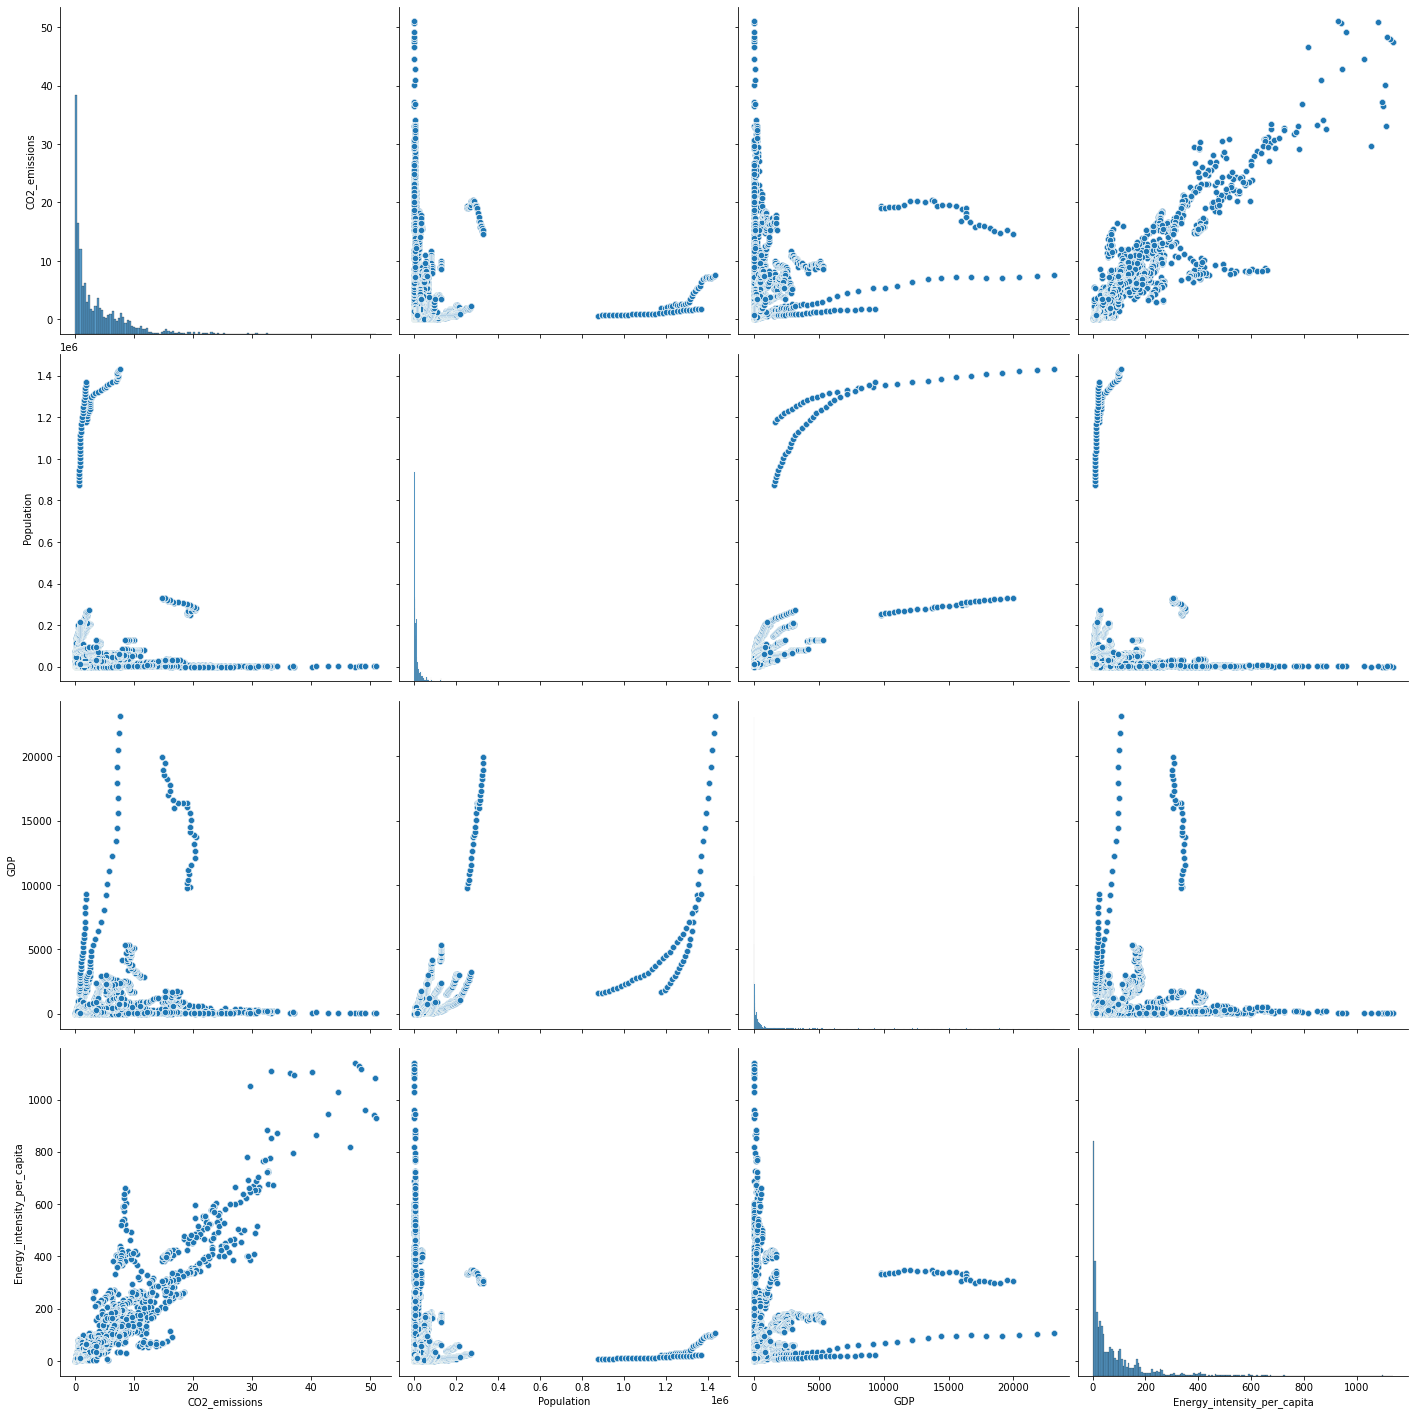

In [90]:
Relation=all_factors[['CO2_emissions','Population','GDP','Energy_intensity_per_capita']]
sns.pairplot(Relation,size=5);

##### From the above we noticed that strong relation between  Energy_intensity_per_capita and CO2 emissions
#### Also, Many countries with low population has high CO2 emissions like Qatar due to Oli extraction and burning
#### Many Countries with low GDP has high CO2 emission due to Coal burning

# Let's answer on some questions 

### 1-The highest region that CO2 emissions

In [80]:
Relation1=df1.groupby('Region').sum().sort_values(by='CO2_emissions',ascending=False)
Relation1

,CO2_emissions
Region,
Europe & Central Asia,10414.012713
Middle East & North Africa,5737.506094
East Asia & Pacific,3852.255495
Latin America & Caribbean,2933.786936
Sub-Saharan Africa,1240.078014
North America,1052.280538
South Asia,184.748551


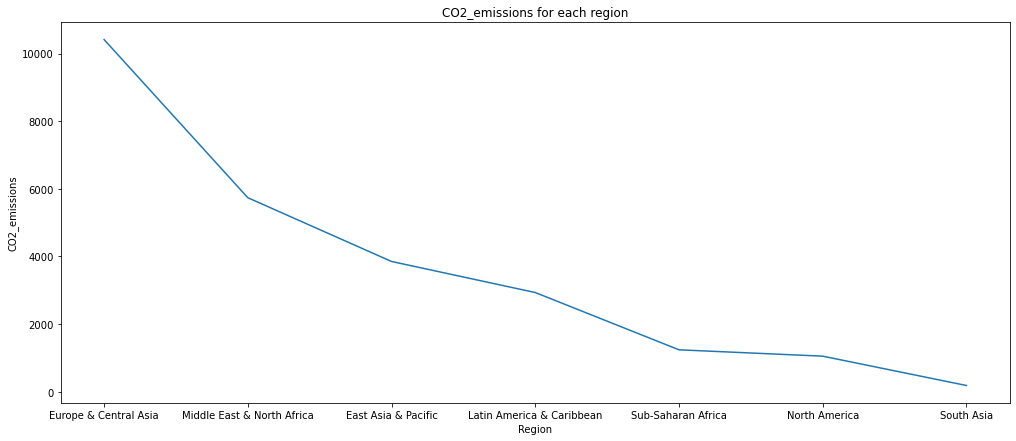

In [81]:
plt.figure(figsize=(17,7))
plt.plot(Relation1.CO2_emissions)
plt.title("CO2_emissions for each region")
plt.xlabel("Region")
plt.ylabel("CO2_emissions");

### 2-The Top 10 Country in CO2 emissions

In [82]:
Relation2=df1.groupby('Country').sum().nlargest(10,'CO2_emissions')
Relation2

,CO2_emissions
Country,
Qatar,1183.479665
United Arab Emirates,771.017886
Bahrain,694.734161
Kuwait,668.307522
Luxembourg,662.097055
United States,559.215426
Australia,520.049076
Brunei Darussalam,497.990205
Canada,493.065113


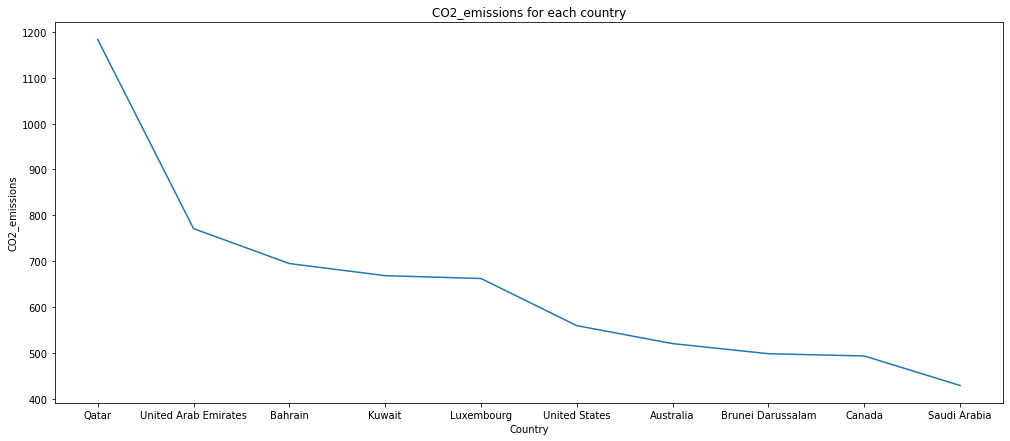

In [83]:
plt.figure(figsize=(17,7))
plt.plot(Relation2.CO2_emissions)
plt.title("CO2_emissions for each country")
plt.xlabel("Country")
plt.ylabel("CO2_emissions");

### 3-Top country in each region in CO2 emissions

In [84]:
df1.groupby(['Region','Country'])['CO2_emissions'].sum().sort_values(ascending=False).to_frame()


    

CO2_emissions
Region                     Country                                
Middle East & North Africa Qatar                       1183.479665
                           United Arab Emirates         771.017886
                           Bahrain                      694.734161
                           Kuwait                       668.307522
Europe & Central Asia      Luxembourg                   662.097055
...                                                            ...
Sub-Saharan Africa         Malawi                         2.056125
                           Somalia                        1.892018
                           Central African Republic       1.573580
                           Congo, Dem. Rep.               1.388137
                           Burundi                        1.110648

[191 rows x 1 columns]

### 4- The largest amount of CO2_emissions in which year


In [85]:
df1.groupby(['year']).sum().nlargest(1,'CO2_emissions')


,CO2_emissions
year,
2009,885.548641


In [86]:
Relation3=df1.groupby(['year'])['CO2_emissions'].sum().to_frame()
Relation3

,CO2_emissions
year,
1990,814.833295
1991,798.060489
1992,789.043694
1993,772.154287
1994,764.517621
1995,785.959408
1996,800.117881
1997,807.636102
1998,809.450873


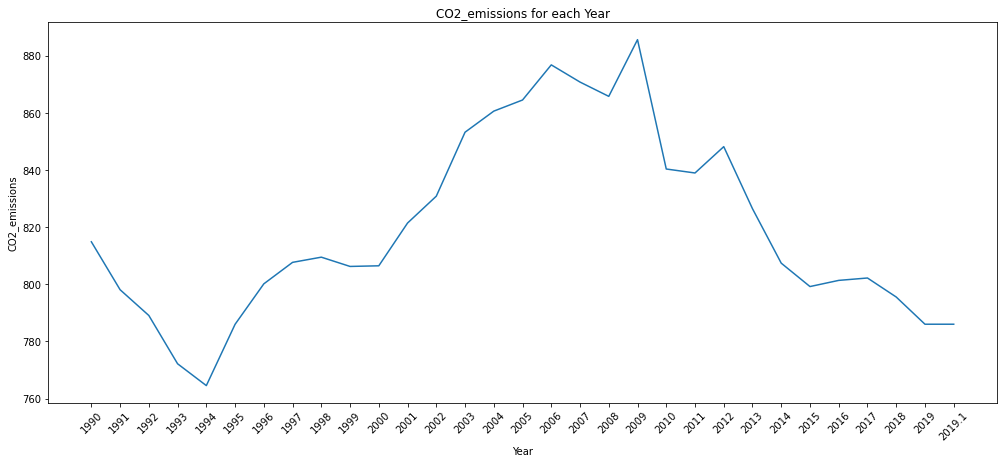

In [87]:
plt.figure(figsize=(17,7))
plt.plot(Relation3.CO2_emissions)
plt.title("CO2_emissions for each Year")
plt.xlabel("Year")
plt.ylabel("CO2_emissions")
plt.xticks(rotation=45);

### Conclusion
-- The main reason for CO2 emission in the World is extract and burning fossil fuels and natural gas to produce energy.
--
